### 载入泰坦尼克数据集

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
titanic = pd.read_csv("titanic-data.csv", index_col = "PassengerId")
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
titanic.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

本课题，我准备研究社会阶层，船票价格和乘客生还率之间的关系。因此首先，我会去掉年龄，性别等不相关的列。

In [5]:
pClass = titanic[["Survived", "Pclass", "Fare"]]
pClass.head()

Survived  Pclass     Fare
PassengerId                           
1                   0       3   7.2500
2                   1       1  71.2833
3                   1       3   7.9250
4                   1       1  53.1000
5                   0       3   8.0500

    取出来之后以生还率和社会阶层做个图

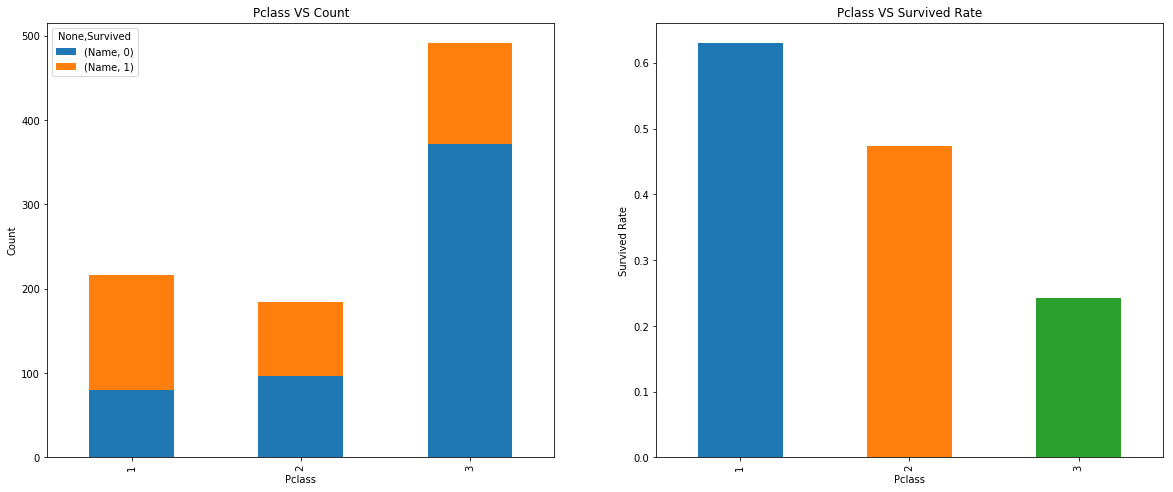

In [6]:
    df = titanic[["Survived", "Pclass", "Name"]]
    plt.figure(figsize = (12, 5))
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_size_inches((20, 8))
    df.groupby(['Pclass', 'Survived']).count().unstack().plot(kind = 'bar', ax = ax1, stacked = True)
    
    ax1.set_title('Pclass VS Count')
    ax1.set_ylabel('Count')
    df.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', ax = ax2)
    ax2.set_title('Pclass VS Survived Rate')
    ax2.set_ylabel('Survived Rate')
    plt.show()

再探究一下阶层和船票价格之间的关系

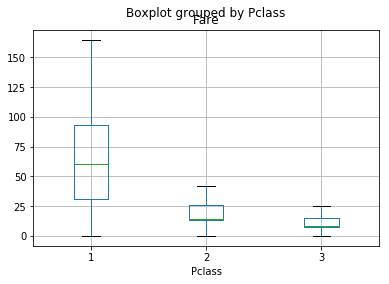

In [7]:
pClass.boxplot(column = 'Fare', by = 'Pclass', showfliers = False)

探究一下船票价格分布和生存人数之间的关系

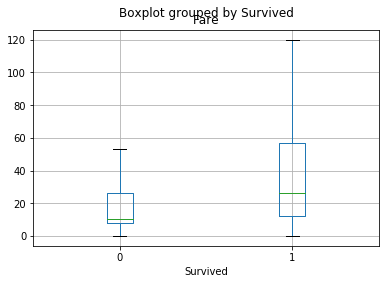

In [8]:
pClass.boxplot(column = 'Fare', by = 'Survived', showfliers = False)

在图中我们产生一个直观印象，似乎高阶层的人生还率要比低阶层的人高。
同时，生还者的平均船票价格也要比总体乘客高。
那么，我们的假设就是，
“泰坦尼克号上个人社会地位越高，生还率越高”。
下面进行量化分析

首先检查是否有没登记阶层、船票价格或者是否生还的

首先按照社会阶级进行分组

In [9]:
groupByClass = pClass.groupby('Pclass')
groupByClass.describe()

Fare                                                                \
        count       mean        std  min       25%      50%   75%       max   
Pclass                                                                        
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292   
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000   
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500   

       Survived                                               
          count      mean       std  min  25%  50%  75%  max  
Pclass                                                        
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

从数据中我们得出，表格中891人每个人都登记了社会阶层

然后按照生还与否进行分类：

In [10]:
groupBySurvived = pClass.groupby('Survived')
groupBySurvived.describe()

Fare                                                            \
          count       mean        std  min      25%   50%   75%       max   
Survived                                                                    
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000   
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292   

         Pclass                                               
          count      mean       std  min  25%  50%  75%  max  
Survived                                                      
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0  
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0

从数据中我们可以看出，表格中891人都是有生还记录的

然后我们观察船票价格，我注意到在数据titanic.describe()中最小船票价格为0，我想把这部分人找出来。注意我定义的函数ifTicketIs0同样可以找出是否有没有登记船票价格(NAN)的人。

In [11]:
def ifTicketIs0orNAN(ticket):
    if ticket > 0:
        return False
    else:
        return True
isFare0 = pClass['Fare'].apply(ifTicketIs0orNAN)
print titanic[isFare0]

             Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Enn

从数据中我们可以看出，所有人的船票价格都是有数值的。这些人来自社会的各个阶层，并且其中有些人登记了船舱号。因此可能并非是逃票的。所以其中应该有些是船员，有些是船票价格记录缺失。我在这里想要分析的是社会阶层，船票价格和乘客生还率之间的关系，因此在这里去除这部分数据。

In [12]:
pClassNew = pClass[isFare0 == False]

In [13]:
pClassNew.groupby('Pclass').describe()

Fare                                                            \
        count       mean        std      min      25%      50%      75%   
Pclass                                                                    
1       211.0  86.148874  78.212155   5.0000  32.9104  61.9792  99.9625   
2       178.0  21.358661  13.083169  10.5000  13.0000  15.0229  26.0000   
3       487.0  13.787875  11.760718   4.0125   7.7500   8.0500  15.5000   

                 Survived                                               
             max    count      mean       std  min  25%  50%  75%  max  
Pclass                                                                  
1       512.3292    211.0  0.644550  0.479788  0.0  0.0  1.0  1.0  1.0  
2        73.5000    178.0  0.488764  0.501284  0.0  0.0  0.0  1.0  1.0  
3        69.5500    487.0  0.242300  0.428915  0.0  0.0  0.0  0.0  1.0

In [14]:
print pClassNew.groupby('Pclass').mean()['Survived'][1]
print pClassNew.groupby('Pclass').mean()['Survived'][2]
print pClassNew.groupby('Pclass').mean()['Survived'][3]

0.6445497630331753
0.4887640449438202
0.24229979466119098


从各个阶层生还均值可以看出，阶层越高的人平均生还率越大。下面做柱状图。

In [36]:
def drawHistogram(df, xlabel_name, title_name):
    df.plot(kind='bar')
    plt.title(title_name)
    plt.xlabel(xlabel_name)
    plt.ylabel("Survived Rate")
    plt.show()

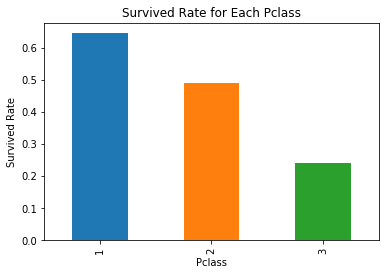

In [37]:
drawHistogram(pClassNew.groupby('Pclass').mean()['Survived'], "Pclass", "Survived Rate for Each Pclass")

然后探讨船票价格对生还率的影响。因为船票价格种类太多，因此做个排序。之后按照价格从低到高将人群均分成10份进行比较。每一份的人数约为86人，将在横坐标轴用括号表示。这样做的好处在于不会导致某个价格区间人数过少，使得统计结果可信度不高。

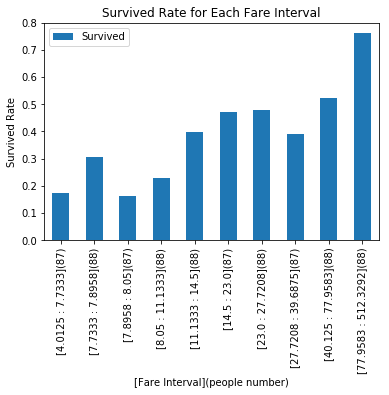

In [28]:
from pylab import *
pClassNew = pClassNew.sort_values(by = 'Fare')
x = np.zeros(shape = (10 , 1))
title = []
for i in range(0, 10):
    x[i] = pClassNew[i * len(pClassNew) / 10 : (i + 1) * len(pClassNew) / 10]['Survived'].mean()
    title.append('[{0} : {1}]({2})'.format(pClassNew[i * len(pClassNew) / 10 : (i + 1) * len(pClassNew) / 10]['Fare'].min(), \
                                        pClassNew[i * len(pClassNew) / 10 : (i + 1) * len(pClassNew) / 10]['Fare'].max(), \
                                        (i + 1 ) * len(pClassNew) / 10 - i * len(pClassNew) / 10 ))
drawHistogram(pd.DataFrame(x, index=title, columns=['Survived']), "[Fare Interval](people number)", "Survived Rate for Each Fare Interval")

从图中可以看出，船票价格小数位数过多影响阅读。因此我们重新整理人群，将船票分为(4:8]，(8:14]，(14:28]，(28:]几个整数区间。每个区间约有200人，样本数量充足。

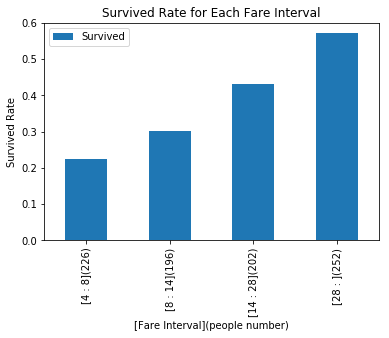

In [79]:
x = np.zeros(shape = (4 , 1))
interval = [4, 8, 14, 28]
title = []
for i in range(0, 4):
    if i != len(interval) - 1:
        x[i] = pClassNew[(pClassNew.Fare > interval[i]) & (pClassNew.Fare <= interval[i + 1])]['Survived'].mean()
        title.append('[{0} : {1}]({2})'.format(interval[i], \
                                        interval[i + 1], \
                                        pClassNew[(pClassNew.Fare > interval[i]) & (pClassNew.Fare <= interval[i + 1])]['Survived'].count()))
    else:
        x[i] = pClassNew[pClassNew.Fare > interval[i]]['Survived'].mean()
        title.append('[{0} : {1}]({2})'.format(interval[i], \
                                        "", \
                                        pClassNew[(pClassNew.Fare > interval[i])]['Survived'].count()))
drawHistogram(pd.DataFrame(x, index=title, columns=['Survived']), "[Fare Interval](people number)", "Survived Rate for Each Fare Interval")

从图中可以看出，随着船票价格升高，乘客所付船票价格越高，其生存率呈上升趋势。
因此，最后得出结论：
泰坦尼克号上，乘客的阶级越高，所付船票价格越高。生存率越高。

最后，探究一下我们本次统计报告的局限性。
因为泰坦尼克数据集本身不是船上所有乘客的统计。因此有可能在没有统计的部分，会有大量低阶层的生还者以及高阶层的死亡者，导致本报告的结果与事实上总体乘客的情况不符。
此外，有可能在统计时，高阶层的生还者倾向于进行登记，导致数据集本身中高阶层生还者的资料更多。这些都有可能对我们本次统计带来偏差。